In [61]:
import pandas as pd 
data_17_18 = pd.read_csv("DatasetsOriginais/transfermarkt/transfermarkt_fbref_201718.csv", delimiter = ';',  index_col=0)
data_18_19 = pd.read_csv("DatasetsOriginais/transfermarkt/transfermarkt_fbref_201819.csv", delimiter = ';',  index_col=0,  low_memory=False)
data_19_20 = pd.read_csv("DatasetsOriginais/transfermarkt/transfermarkt_fbref_201920.csv", delimiter = ';',  index_col=0)
classificacao = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/classEquipas.csv", delimiter=',', index_col=0)

In [62]:
print("Número de entradas no dataset 17-18:", data_17_18.shape[0])
print("Número de entradas no dataset 18-19:", data_18_19.shape[0])
print("Número de entradas no dataset 19-20:", data_19_20.shape[0])
print("Número", classificacao.shape[0])


print("Número de colunas no dataset 17-18:", data_17_18.shape[1])
print("Número de colunas no dataset 18-19:", data_18_19.shape[1])
print("Número de colunas no dataset 19-20:", data_19_20.shape[1])

Número de entradas no dataset 17-18: 2232
Número de entradas no dataset 18-19: 2232
Número de entradas no dataset 19-20: 2644
Número 214
Número de colunas no dataset 17-18: 399
Número de colunas no dataset 18-19: 399
Número de colunas no dataset 19-20: 399


In [63]:
data_17_18['season_year'] = 2018
data_18_19['season_year'] = 2019
data_19_20['season_year'] = 2020

In [64]:
data_17_18 = data_17_18.merge(classificacao, left_on=['squad', 'season_year'], right_on=['equipa', 'epoca'], how='left')
data_18_19 = data_18_19.merge(classificacao, left_on=['squad', 'season_year'], right_on=['equipa', 'epoca'], how='left')
data_19_20 = data_19_20.merge(classificacao, left_on=['squad', 'season_year'], right_on=['equipa', 'epoca'], how='left')

print(data_17_18)

              player nationality position        squad  age  birth_year  \
0             Burgui      es ESP    FW,MF       Alavés   23        1993   
1     Raphaël Varane      fr FRA       DF  Real Madrid   24        1993   
2       Rubén Duarte      es ESP       DF       Alavés   21        1995   
3      Samuel Umtiti      fr FRA       DF    Barcelona   23        1993   
4        Manu García      es ESP       MF       Alavés   31        1986   
...              ...         ...      ...          ...  ...         ...   
2227  Victor Osimhen      ng NGA    FW,MF    Wolfsburg   18        1998   
2228  Renato Steffen      ch SUI    FW,MF    Wolfsburg   25        1991   
2229    Paul Jaeckel      de GER       DF    Wolfsburg   19        1998   
2230   Paul Verhaegh      nl NED       DF    Wolfsburg   33        1983   
2231         William      br BRA       DF    Wolfsburg   22        1995   

         value  height                      position2   foot  ... xGDiff/90  \
0      1800000     1

In [65]:
data_17_18 = data_17_18.drop('Season', axis=1)
data_18_19 = data_18_19.drop('Season', axis=1)
data_19_20 = data_19_20.drop('Season', axis=1)

data_17_18 = data_17_18.drop('Attendance', axis=1)
data_18_19 = data_18_19.drop('Attendance', axis=1)
data_19_20 = data_19_20.drop('Attendance', axis=1)

data_17_18 = data_17_18.drop('equipa', axis =1)
data_18_19 = data_18_19.drop('equipa', axis =1)
data_19_20 = data_19_20.drop('equipa', axis =1)

data_17_18 = data_17_18.drop('liga', axis =1)
data_18_19 = data_18_19.drop('liga', axis =1)
data_19_20 = data_19_20.drop('liga', axis =1)


data_17_18 = data_17_18.drop('squad', axis=1)
data_18_19 = data_18_19.drop('squad', axis=1)
data_19_20 = data_19_20.drop('squad', axis=1)

#data_17_18 = data_17_18.drop('season_year', axis=1)
#data_18_19 = data_18_19.drop('season_year', axis=1)
#data_19_20 = data_19_20.drop('season_year', axis=1)

data_17_18['nationality'] = data_17_18['nationality'].str[-3:]
data_18_19['nationality'] = data_18_19['nationality'].str[-3:]
data_19_20['nationality'] = data_19_20['nationality'].str[-3:]


data_17_18 = data_17_18.dropna()
data_18_19 = data_18_19.dropna()
data_19_20 = data_19_20.dropna()

print(data_17_18)

null_counts1 = data_17_18.isnull().sum()
null_counts2 = data_18_19.isnull().sum()
null_counts3 = data_19_20.isnull().sum()

#print(null_counts)
#data.shape[0]

                 player nationality position  age  birth_year     value  \
0                Burgui         ESP    FW,MF   23        1993   1800000   
1        Raphaël Varane         FRA       DF   24        1993  70000000   
2          Rubén Duarte         ESP       DF   21        1995   2000000   
3         Samuel Umtiti         FRA       DF   23        1993  60000000   
4           Manu García         ESP       MF   31        1986   1800000   
...                 ...         ...      ...  ...         ...       ...   
2225  Paul-Georges Ntep         CMR    FW,MF   25        1992   4000000   
2226       Divock Origi         BEL       FW   22        1995  10000000   
2227     Victor Osimhen         NGA    FW,MF   18        1998   1000000   
2228     Renato Steffen         SUI    FW,MF   25        1991   3500000   
2229       Paul Jaeckel         GER       DF   19        1998      5000   

      height                      position2   foot      league  ...  Pts/G  \
0        186         

In [66]:

data_17_18.to_csv('1718tratado.csv', index=False)
data_18_19.to_csv('1819tratado.csv', index=False)
data_19_20.to_csv('1920tratado.csv', index=False)

In [67]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Merge 

data = pd.concat([data_17_18, data_18_19, data_19_20], ignore_index=True)

data.head()


,player,nationality,position,age,birth_year,value,height,position2,foot,league,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,season_year,classificacao
0,Burgui,ESP,"FW,MF",23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,La Liga,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0
1,Raphaël Varane,FRA,DF,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,La Liga,...,2.00,83.3,45.4,37.9,1.00,1.0,1.0,0.0,2018,3.0
2,Rubén Duarte,ESP,DF,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,La Liga,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0
3,Samuel Umtiti,FRA,DF,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,La Liga,...,2.45,78.3,41.1,37.2,0.98,1.0,0.0,0.0,2018,1.0
4,Manu García,ESP,MF,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,La Liga,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0


In [68]:
data.to_csv('mergedTratado.csv', index=False)

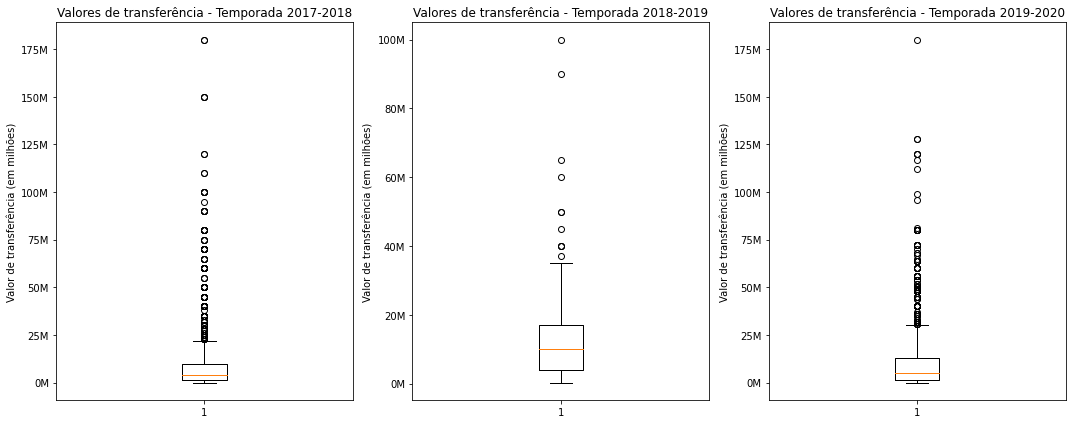

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrar os dados para cada temporada
data_2017_2018 = data[data['season_year'] == 2018]
data_2018_2019 = data[data['season_year'] == 2019]
data_2019_2020 = data[data['season_year'] == 2020]

# Configurar a figura e os eixos
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Definir o formatador de rótulo personalizado
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

# Configurar o formatador para os eixos y
y_formatter = ticker.FuncFormatter(millions_formatter)

# Boxplot para a temporada 2017-2018
ax[0].boxplot(data_2017_2018['value'])
ax[0].set_title('Valores de transferência - Temporada 2017-2018')
ax[0].set_ylabel('Valor de transferência (em milhões)')
ax[0].yaxis.set_major_formatter(y_formatter)

# Boxplot para a temporada 2018-2019
ax[1].boxplot(data_2018_2019['value'])
ax[1].set_title('Valores de transferência - Temporada 2018-2019')
ax[1].set_ylabel('Valor de transferência (em milhões)')
ax[1].yaxis.set_major_formatter(y_formatter)

# Boxplot para a temporada 2019-2020
ax[2].boxplot(data_2019_2020['value'])
ax[2].set_title('Valores de transferência - Temporada 2019-2020')
ax[2].set_ylabel('Valor de transferência (em milhões)')
ax[2].yaxis.set_major_formatter(y_formatter)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


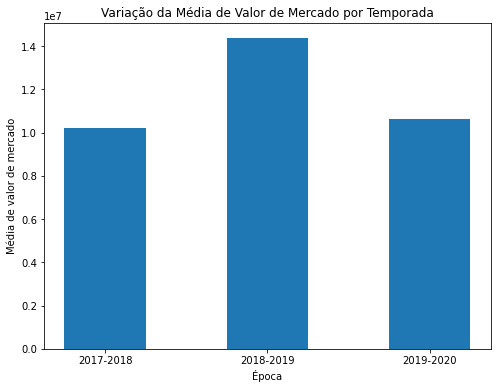

In [70]:
# Calcular a média do valor de mercado para cada temporada
media_2017_2018 = data_2017_2018['value'].mean()
media_2018_2019 = data_2018_2019['value'].mean() 
media_2019_2020 = data_2019_2020['value'].mean() 

# Configurar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Criar as barras
bar_width = 0.5
bar_positions = [0, 1, 2]
bar_values = [media_2017_2018, media_2018_2019, media_2019_2020]
bar_labels = ['2017-2018', '2018-2019', '2019-2020']
ax.bar(bar_positions, bar_values, width=bar_width)

# Configurar os rótulos dos eixos
ax.set_xlabel('Época')
ax.set_ylabel('Média de valor de mercado')
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels)

# Configurar o título do gráfico
ax.set_title('Variação da Média de Valor de Mercado por Temporada')

# Exibir o gráfico
plt.show()


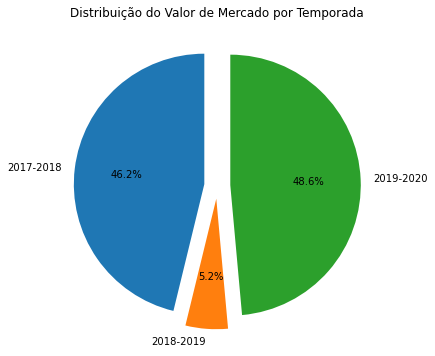

In [71]:
# Calcular a soma do valor de mercado para cada temporada
soma_2017_2018 = data_2017_2018['value'].sum()
soma_2018_2019 = data_2018_2019['value'].sum()
soma_2019_2020 = data_2019_2020['value'].sum()

# Configurar as informações do gráfico
labels = ['2017-2018', '2018-2019', '2019-2020']
sizes = [soma_2017_2018, soma_2018_2019, soma_2019_2020]
explode = (0.1, 0.1, 0.1)  # Define a fatia destacada

# Configurar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Criar o gráfico de pizza
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Configurar o título do gráfico
ax.set_title('Distribuição do Valor de Mercado por Temporada')

# Exibir o gráfico
plt.show()

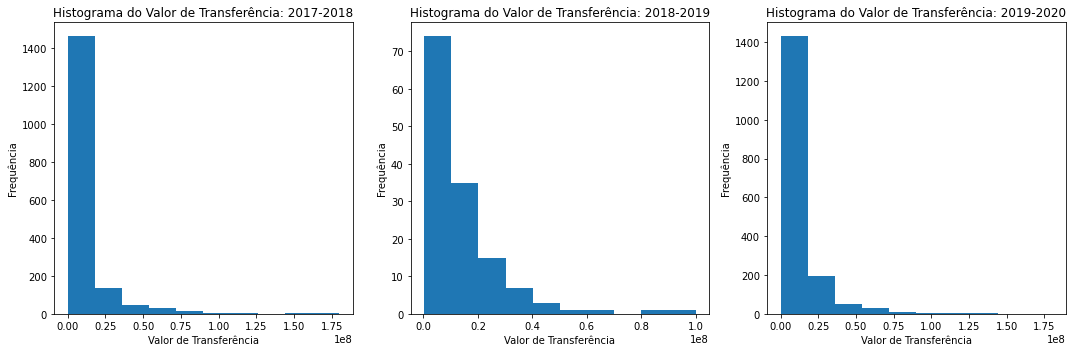

In [72]:
# Configurar a figura e os eixos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para a temporada 2017-2018
ax[0].hist(data_2017_2018['value'], bins=10)
ax[0].set_xlabel('Valor de Transferência')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Histograma do Valor de Transferência: 2017-2018')

# Histograma para a temporada 2018-2019
ax[1].hist(data_2018_2019['value'], bins=10)
ax[1].set_xlabel('Valor de Transferência')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Histograma do Valor de Transferência: 2018-2019')

# Histograma para a temporada 2019-2020
ax[2].hist(data_2019_2020['value'], bins=10)
ax[2].set_xlabel('Valor de Transferência')
ax[2].set_ylabel('Frequência')
ax[2].set_title('Histograma do Valor de Transferência: 2019-2020')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

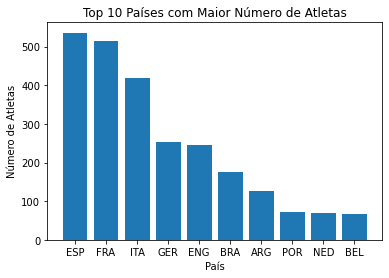

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular o número de atletas por país
nation_count = data['nationality'].value_counts().reset_index()
nation_count.columns = ['country', 'count']

# Filtrar os 10 países com o maior número de atletas
top_10_nations = nation_count.nlargest(10, 'count')

# Ordenar os países em ordem decrescente
top_10_nations = top_10_nations.sort_values('count', ascending=False)

# Criar o gráfico de barras
plt.bar(top_10_nations['country'], top_10_nations['count'])
plt.xlabel('País')
plt.ylabel('Número de Atletas')
plt.title('Top 10 Países com Maior Número de Atletas')

# Exibir o gráfico
plt.show()

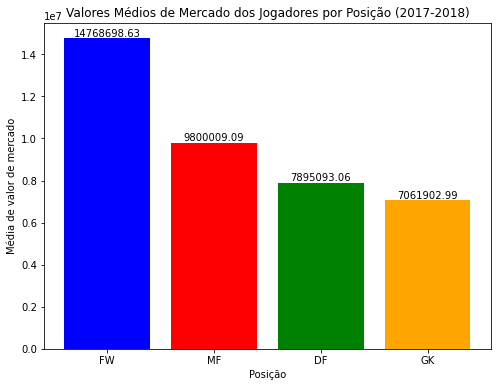

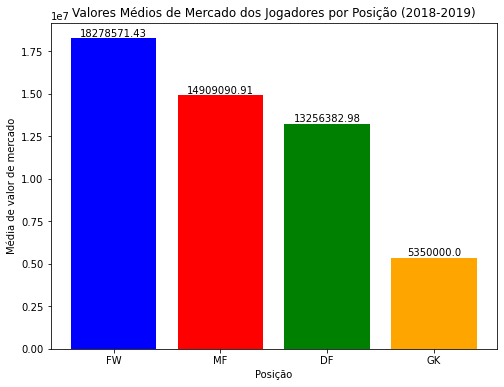

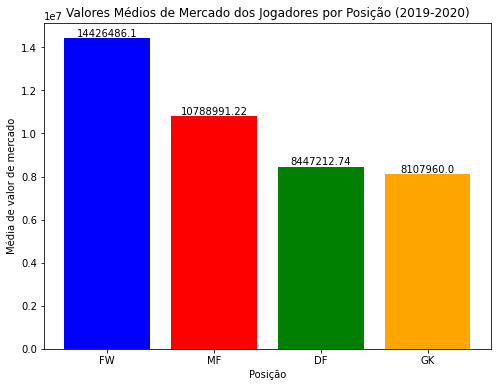

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets para cada temporada
datasets = [data_17_18, data_18_19, data_19_20]

# Configurar as épocas
epocas = ['2017-2018', '2018-2019', '2019-2020']

# Posições e cores para cada posição
#posicoes = ['GK', 'DF', 'MF', 'FW']
posicoes = ['FW', 'MF', 'DF', 'GK']
cores = ['blue', 'red', 'green', 'orange']

# Criar os gráficos
for i in range(len(epocas)):
    valores_medios = [0] * len(posicoes)
    contagens = [0] * len(posicoes)
    
    for dataset in datasets[i:i+1]:
        for index, row in dataset.iterrows():
            posicao = row['position']
            valor = row['value']
            
            if isinstance(posicao, str) and ',' in posicao:
                posicao = posicao.split(',')[0]
            
            if posicao in posicoes:
                idx = posicoes.index(posicao)
                valores_medios[idx] += valor
                contagens[idx] += 1
    
    for j in range(len(valores_medios)):
        if contagens[j] > 0:
            valores_medios[j] /= contagens[j]
    
    # Configurar a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Criar as barras
    bar_positions = np.arange(len(posicoes))
    ax.bar(bar_positions, valores_medios, color=cores)
    
    # Configurar os rótulos dos eixos
    ax.set_xlabel('Posição')
    ax.set_ylabel('Média de valor de mercado')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(posicoes)
    
    # Configurar o título do gráfico
    ax.set_title(f'Valores Médios de Mercado dos Jogadores por Posição ({epocas[i]})')
    
    # Adicionar rótulos de texto nas barras
    for j, v in enumerate(valores_medios):
        ax.text(j, v, str(round(v, 2)), ha='center', va='bottom')
    
    # Exibir o gráfico
    plt.show()

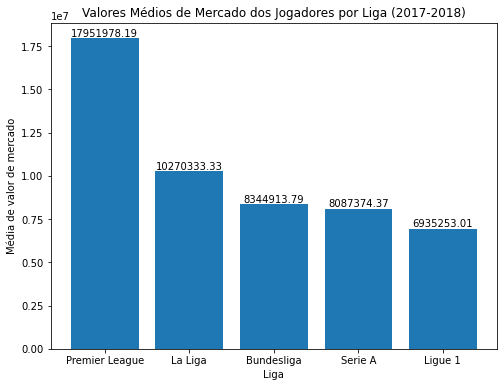

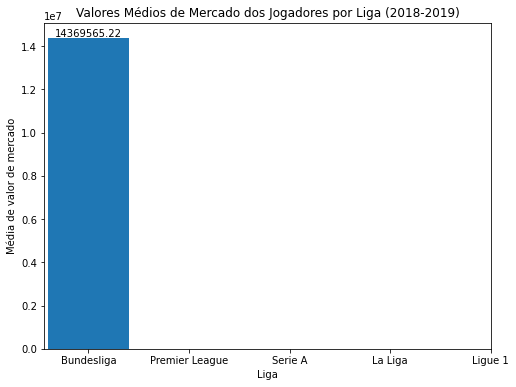

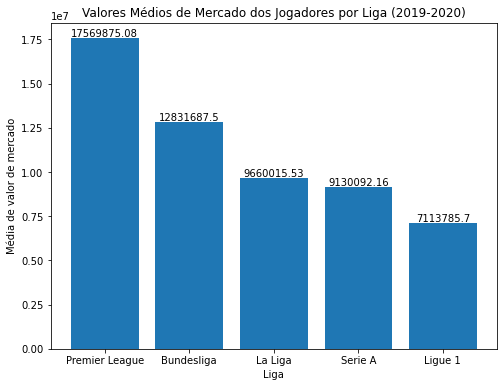

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets para cada temporada
datasets = [data_17_18, data_18_19, data_19_20]

# Configurar as épocas
epocas = ['2017-2018', '2018-2019', '2019-2020']

# Obter a lista de todas as ligas
ligas = set()

for dataset in datasets:
    ligas.update(dataset['league'])

# Criar os gráficos
for i in range(len(epocas)):
    valores_medios = []
    
    for liga in ligas:
        # Filtrar os dados da liga e época atual
        filtro = (datasets[i]['league'] == liga)
        valores = datasets[i].loc[filtro, 'value']
        
        # Calcular o valor médio de mercado para a liga e época atual
        valor_medio = np.mean(valores)
        
        # Adicionar o valor médio à lista
        valores_medios.append(valor_medio)

    # Ordenar as ligas e os valores médios em ordem decrescente
    ligas_sorted, valores_sorted = zip(*sorted(zip(ligas, valores_medios), key=lambda x: x[1], reverse=True))

    # Configurar a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 6))

    # Criar as barras
    bar_positions = np.arange(len(ligas))
    ax.bar(bar_positions, valores_sorted)

    # Configurar os rótulos dos eixos
    ax.set_xlabel('Liga')
    ax.set_ylabel('Média de valor de mercado')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(ligas_sorted)

    # Configurar o título do gráfico
    ax.set_title(f'Valores Médios de Mercado dos Jogadores por Liga ({epocas[i]})')

    # Adicionar rótulos de texto nas barras
    for j, v in enumerate(valores_sorted):
    	if np.isfinite(v):
        	ax.text(j, v, str(round(v, 2)), ha='center', va='bottom')

    # Exibir o gráfico
    plt.show()